In [ ]:
import os
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cpu")

In [ ]:
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size * 4, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.05MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.23MB/s]


In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
        )

        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Sigmoid()  # [0,1]
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std, eps

    def forward(self, x):
        x = x.view(x.size(0), -1)
        h = self.encoder(x)

        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)

        z, eps = self.reparameterize(mu, logvar)

        x_recon = self.decoder(z)
        x_recon = x_recon.view(x.size(0), 1, 28, 28)
        return x_recon, mu, logvar, z, eps

latent_dim = 2
model = VAE(latent_dim=latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
def loss_function(x, x_recon, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(x_recon, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

## Câu hỏi 1:
**Mô tả:** Mô hình VAE Encoder trong ảnh nhận đầu vào là hình ảnh và đầu ra gồm mean ($\mu$) và log(variance) ($logvar$) có giá trị được cho trước như trong hình. Ngoài ra, trong Reparameterization Trick, cho trước giá trị của $\epsilon$ như trong hình.

**Yêu cầu:** Hãy tính các giá trị của $z$ và chọn đáp án có kết quả gần đúng nhất.

**Trắc nghiệm**:

A. $[1.39, 2.82]$

B. $[1.39, 2.29]$

C. $[1.28, 2.29]$

D. $[6.28, 2.82]$

**Đáp án: C**

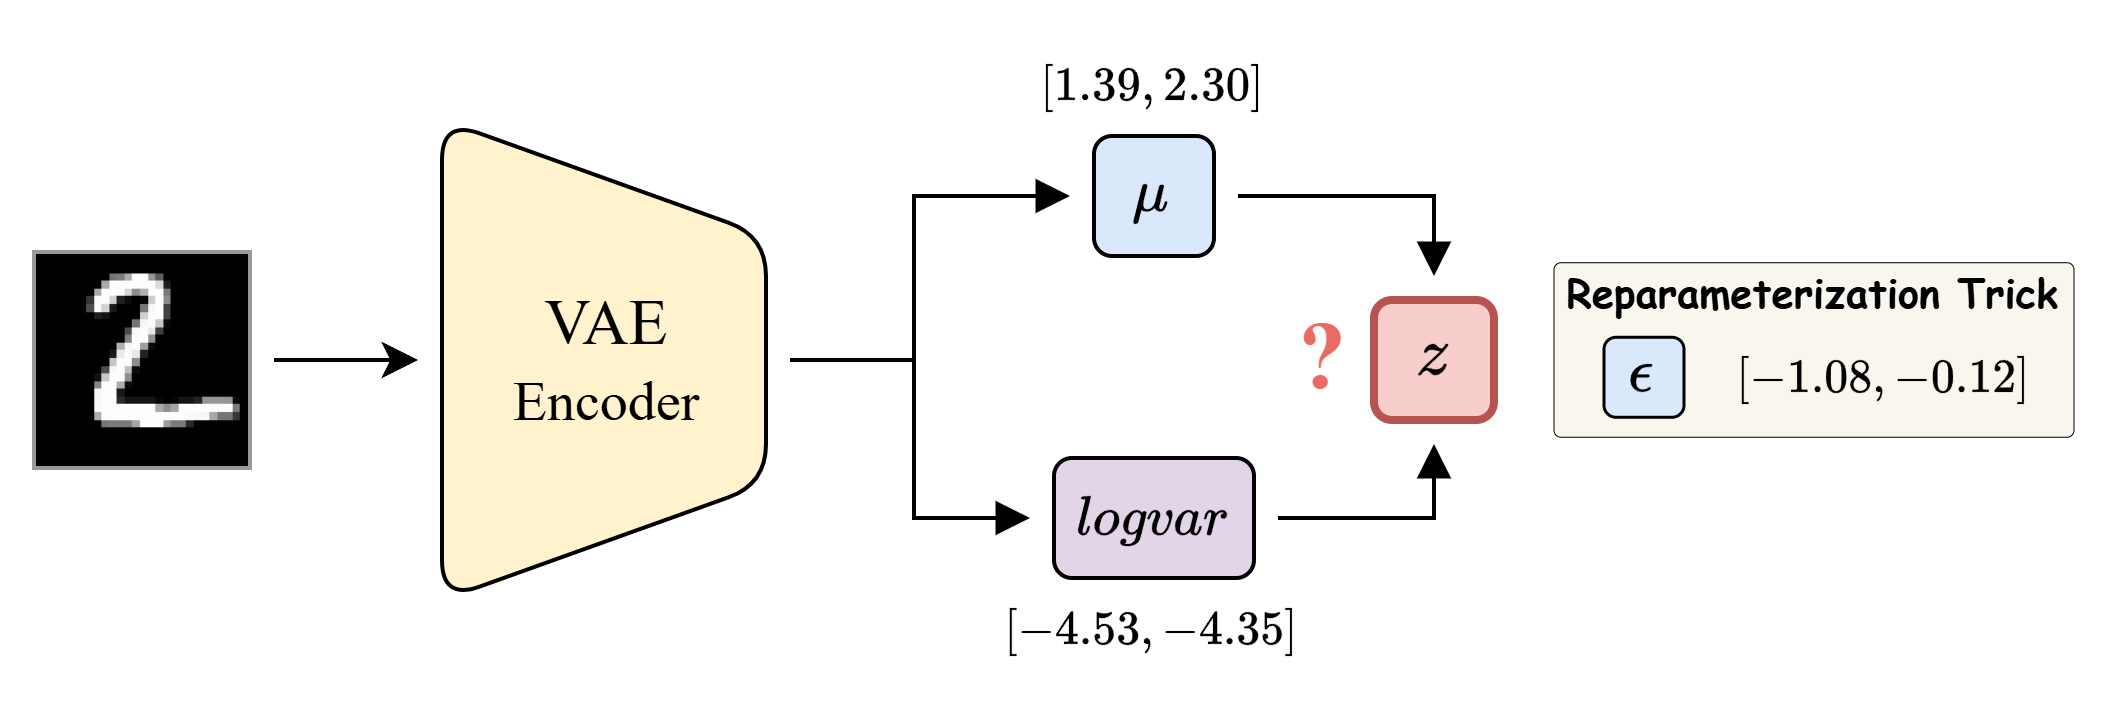

Epoch 1/20, Loss: 195.1544
Mean:  tensor([1.3313, 2.6195])
Logvar:  tensor([-3.1683, -2.3133])
Z:  tensor([1.2202, 2.6398])
Eps:  tensor([-0.5416,  0.0643])


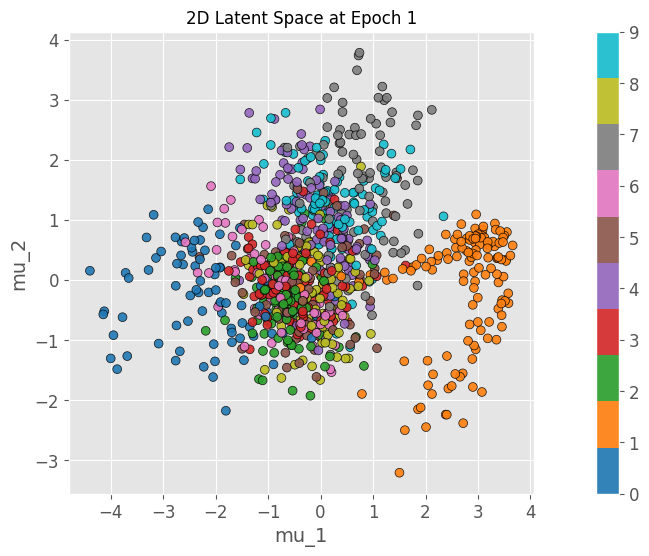

Epoch 2/20, Loss: 165.3196
Mean:  tensor([1.5991, 2.6888])
Logvar:  tensor([-3.6936, -2.9024])
Z:  tensor([1.5271, 2.6133])
Eps:  tensor([-0.4563, -0.3223])


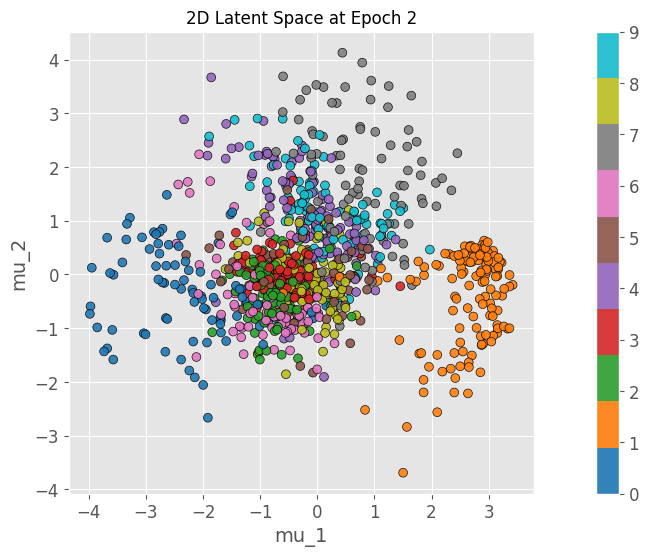

Epoch 3/20, Loss: 159.5777
Mean:  tensor([1.7427, 2.8144])
Logvar:  tensor([-4.0710, -3.3955])
Z:  tensor([1.9267, 2.6326])
Eps:  tensor([ 1.4086, -0.9929])


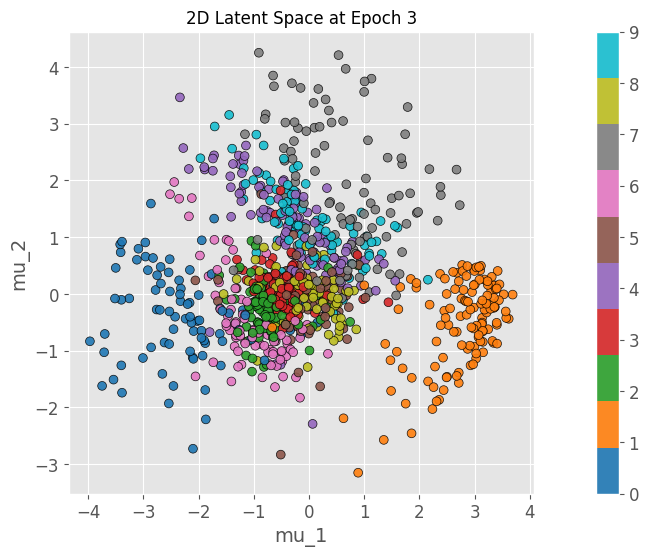

Epoch 4/20, Loss: 155.7142
Mean:  tensor([1.7066, 2.5753])
Logvar:  tensor([-4.1863, -3.2420])
Z:  tensor([1.8306, 2.2832])
Eps:  tensor([ 1.0051, -1.4777])


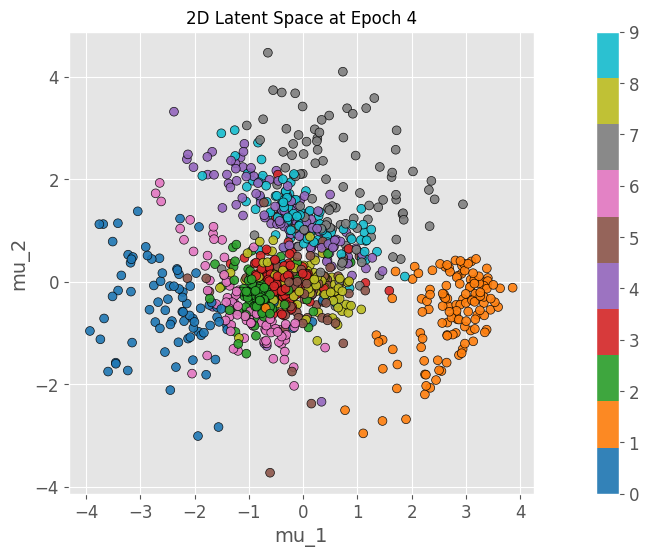

Epoch 5/20, Loss: 153.1622
Mean:  tensor([1.7610, 2.5917])
Logvar:  tensor([-4.1223, -3.3826])
Z:  tensor([1.5415, 2.6367])
Eps:  tensor([-1.7241,  0.2444])


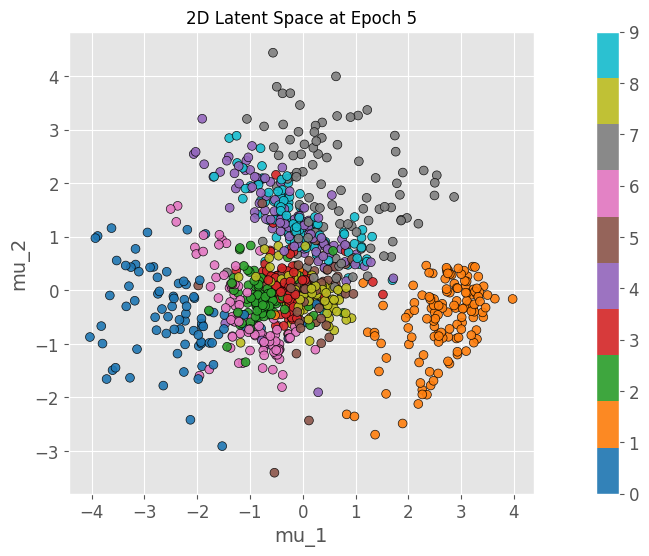

Epoch 6/20, Loss: 151.1958
Mean:  tensor([1.7843, 2.7034])
Logvar:  tensor([-4.3123, -3.4960])
Z:  tensor([1.6476, 2.6094])
Eps:  tensor([-1.1806, -0.5402])


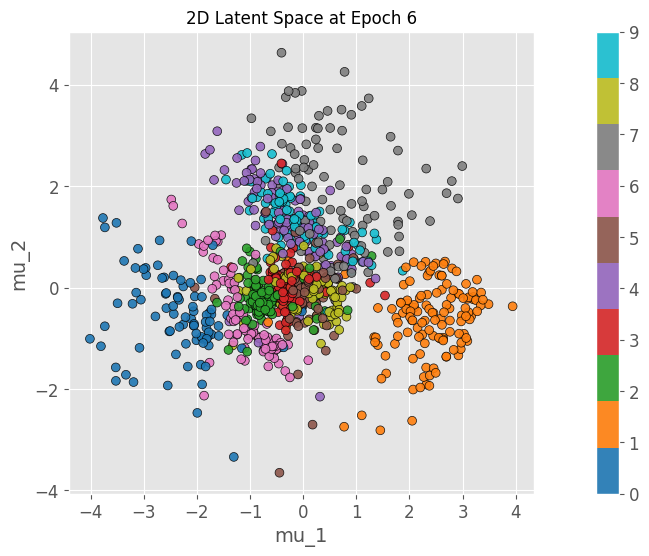

Epoch 7/20, Loss: 149.3491
Mean:  tensor([1.8633, 2.8186])
Logvar:  tensor([-4.6048, -3.7871])
Z:  tensor([1.7623, 2.8075])
Eps:  tensor([-1.0094, -0.0741])


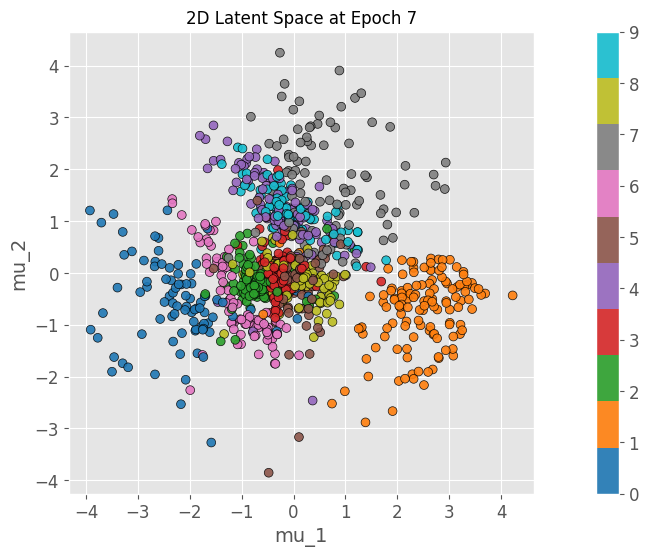

Epoch 8/20, Loss: 147.9319
Mean:  tensor([1.6530, 2.7621])
Logvar:  tensor([-4.7013, -3.9402])
Z:  tensor([1.7884, 2.9620])
Eps:  tensor([1.4204, 1.4337])


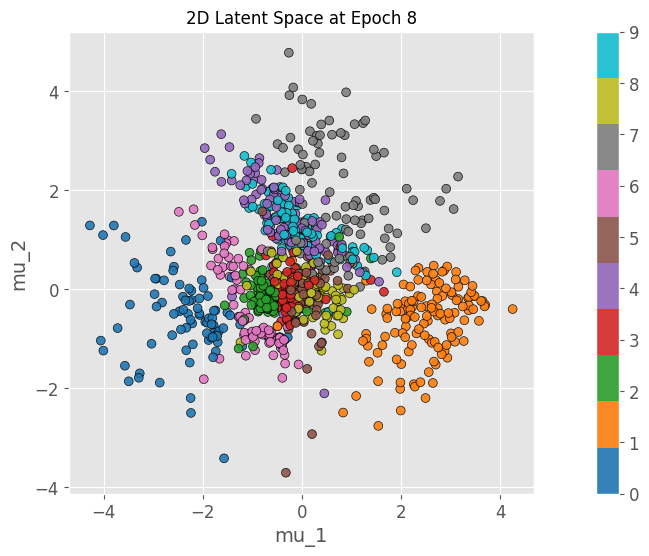

Epoch 9/20, Loss: 146.9904
Mean:  tensor([1.7490, 2.7377])
Logvar:  tensor([-4.5126, -3.8828])
Z:  tensor([1.8123, 2.7265])
Eps:  tensor([ 0.6049, -0.0776])


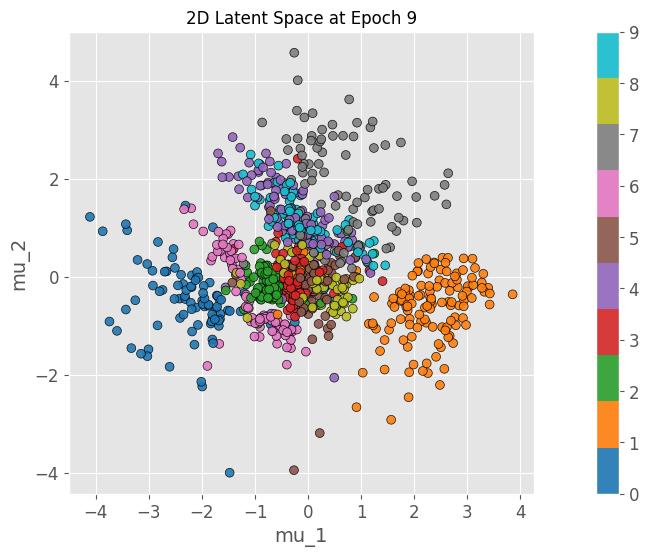

Epoch 10/20, Loss: 146.0005
Mean:  tensor([1.5922, 2.4834])
Logvar:  tensor([-4.5807, -3.9864])
Z:  tensor([1.4228, 2.2865])
Eps:  tensor([-1.6736, -1.4452])


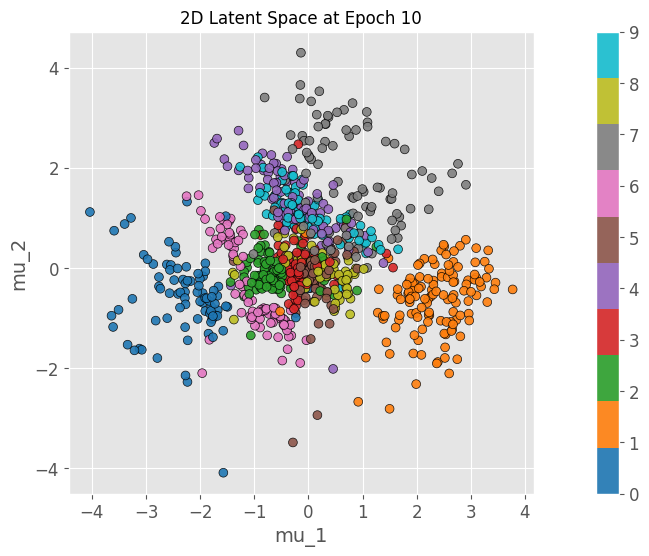

Epoch 11/20, Loss: 145.1408
Mean:  tensor([1.5414, 2.5273])
Logvar:  tensor([-4.4503, -3.9725])
Z:  tensor([1.4816, 2.5534])
Eps:  tensor([-0.5533,  0.1901])


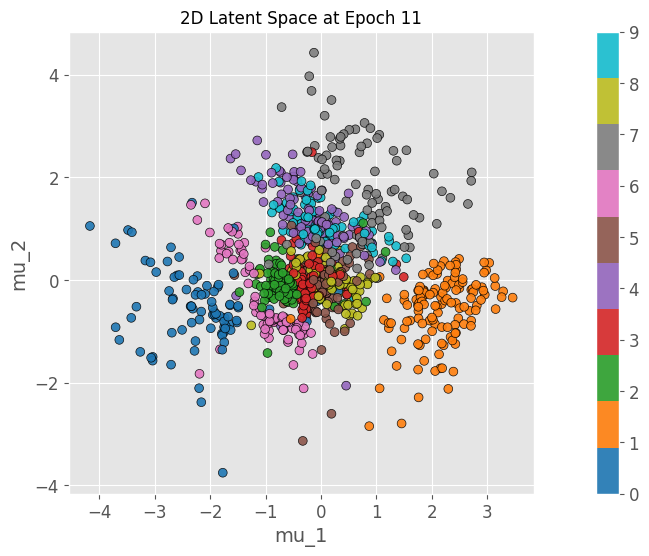

Epoch 12/20, Loss: 144.3769
Mean:  tensor([1.4622, 2.6268])
Logvar:  tensor([-4.4111, -4.1069])
Z:  tensor([1.1938, 2.4553])
Eps:  tensor([-2.4359, -1.3368])


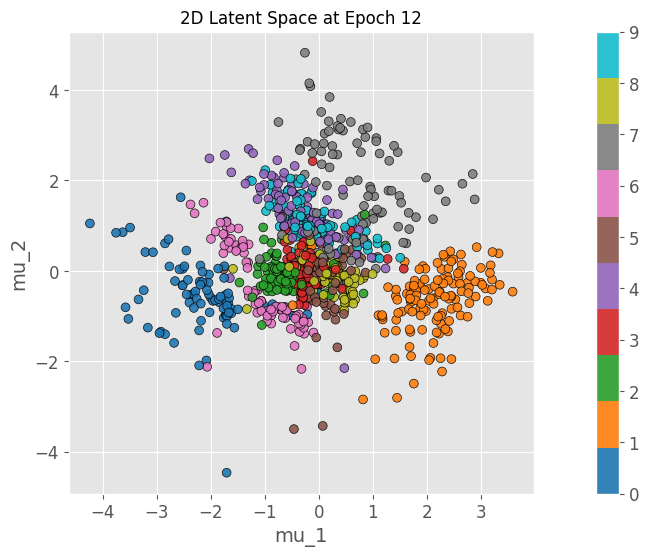

Epoch 13/20, Loss: 143.7883
Mean:  tensor([1.5440, 2.5843])
Logvar:  tensor([-4.8691, -4.5964])
Z:  tensor([1.4936, 2.4166])
Eps:  tensor([-0.5755, -1.6701])


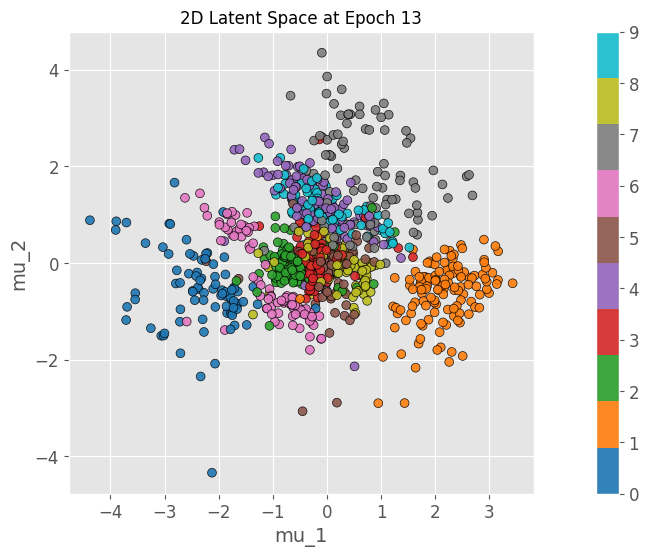

Epoch 14/20, Loss: 143.2713
Mean:  tensor([1.3716, 2.5611])
Logvar:  tensor([-4.5791, -4.0774])
Z:  tensor([1.4575, 2.4197])
Eps:  tensor([ 0.8476, -1.0862])


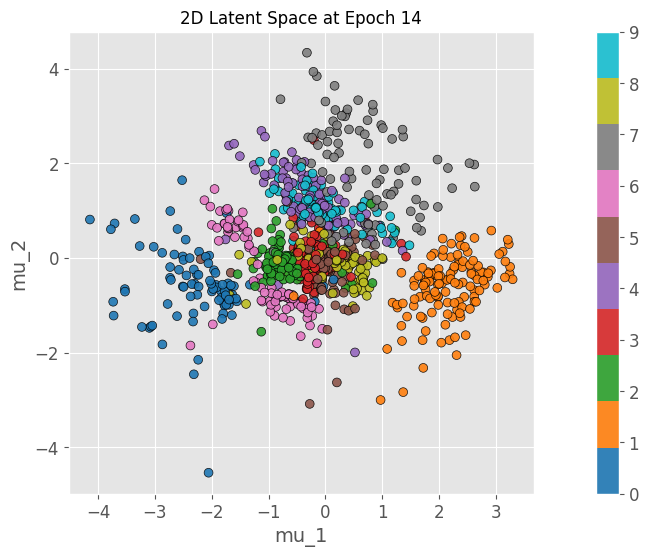

Epoch 15/20, Loss: 142.6833
Mean:  tensor([1.4885, 2.4874])
Logvar:  tensor([-4.7687, -4.3919])
Z:  tensor([1.6145, 2.6031])
Eps:  tensor([1.3683, 1.0398])


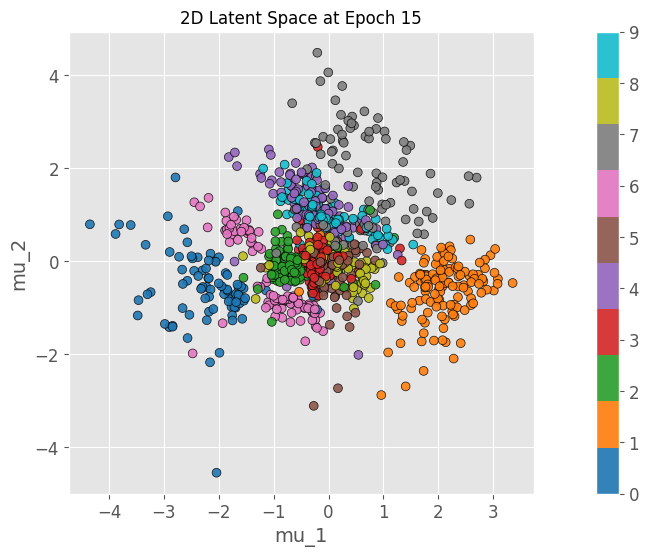

Epoch 16/20, Loss: 142.2027
Mean:  tensor([1.4339, 2.3895])
Logvar:  tensor([-4.5637, -4.2110])
Z:  tensor([1.1790, 2.5565])
Eps:  tensor([-2.4975,  1.3710])


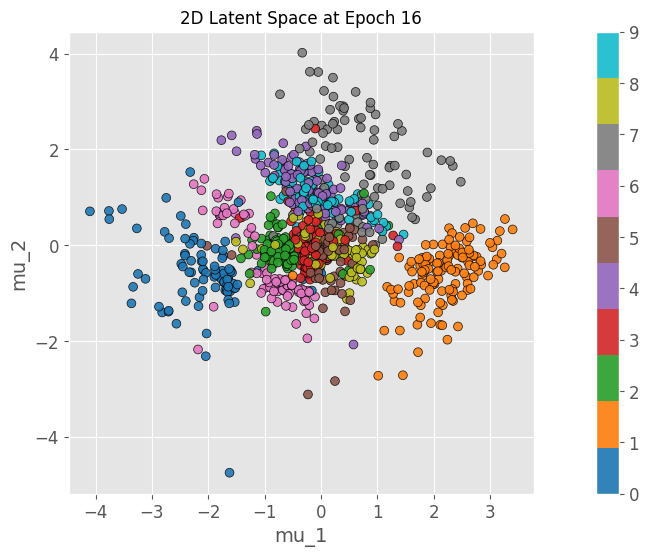

Epoch 17/20, Loss: 141.8955
Mean:  tensor([1.2916, 2.3284])
Logvar:  tensor([-4.3292, -4.2357])
Z:  tensor([1.3301, 2.4416])
Eps:  tensor([0.3349, 0.9411])


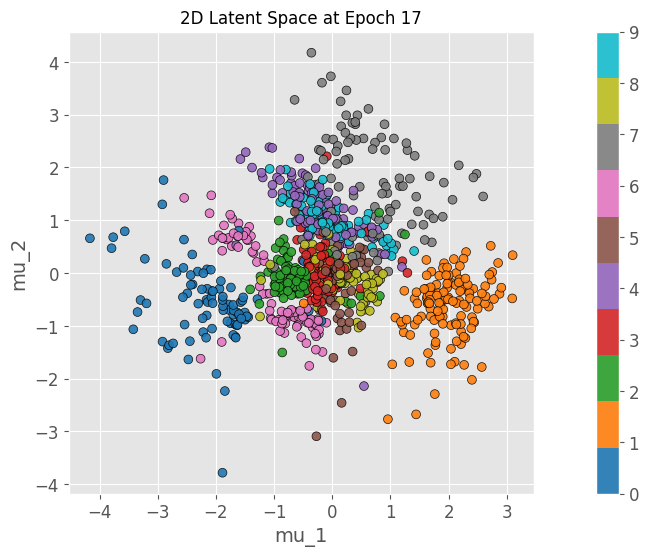

Epoch 18/20, Loss: 141.4524
Mean:  tensor([1.2757, 2.3771])
Logvar:  tensor([-4.7069, -4.7344])
Z:  tensor([1.4160, 2.4682])
Eps:  tensor([1.4756, 0.9718])


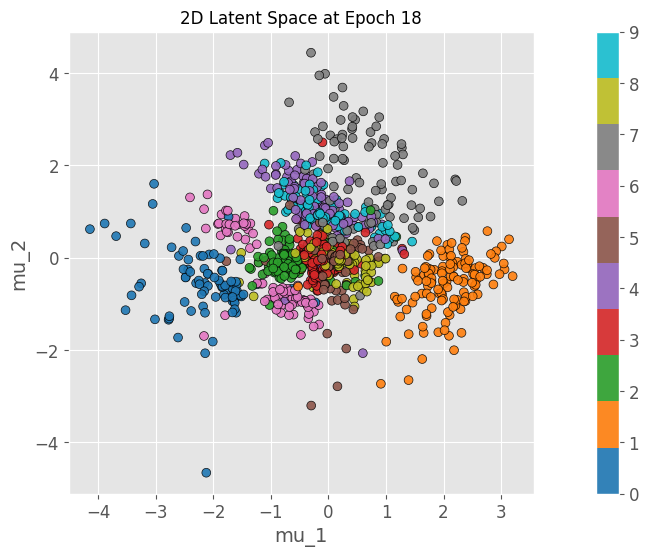

Epoch 19/20, Loss: 141.0441
Mean:  tensor([1.4584, 2.5140])
Logvar:  tensor([-4.8228, -4.7323])
Z:  tensor([1.3354, 2.3509])
Eps:  tensor([-1.3717, -1.7380])


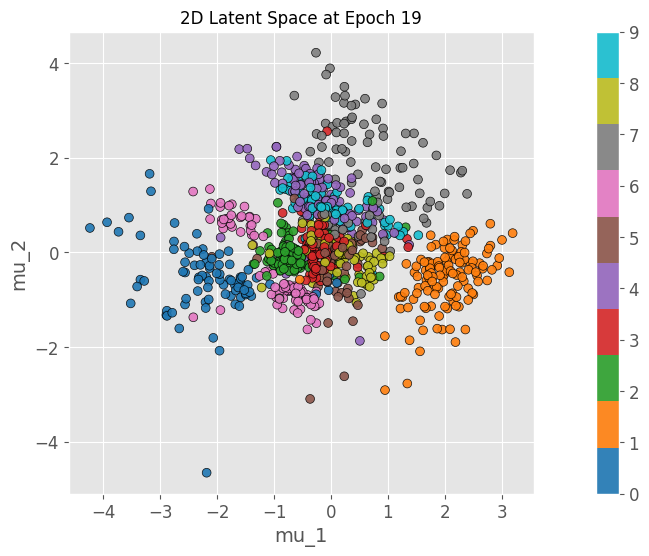

Epoch 20/20, Loss: 140.6686
Mean:  tensor([1.3890, 2.3036])
Logvar:  tensor([-4.5288, -4.3504])
Z:  tensor([1.2771, 2.2900])
Eps:  tensor([-1.0771, -0.1201])


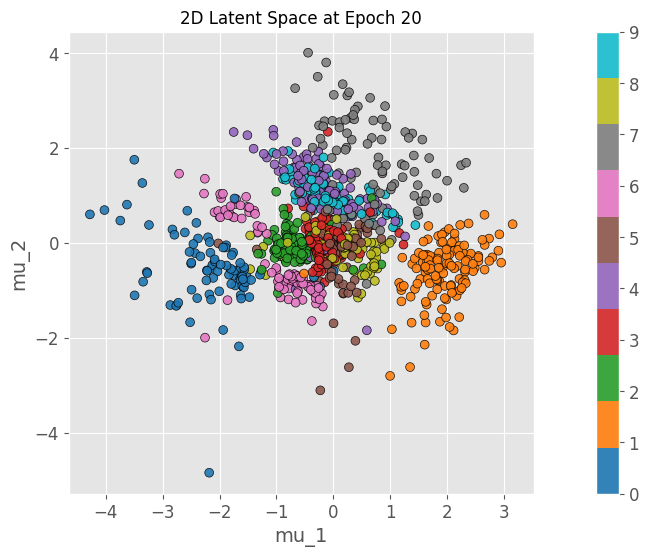

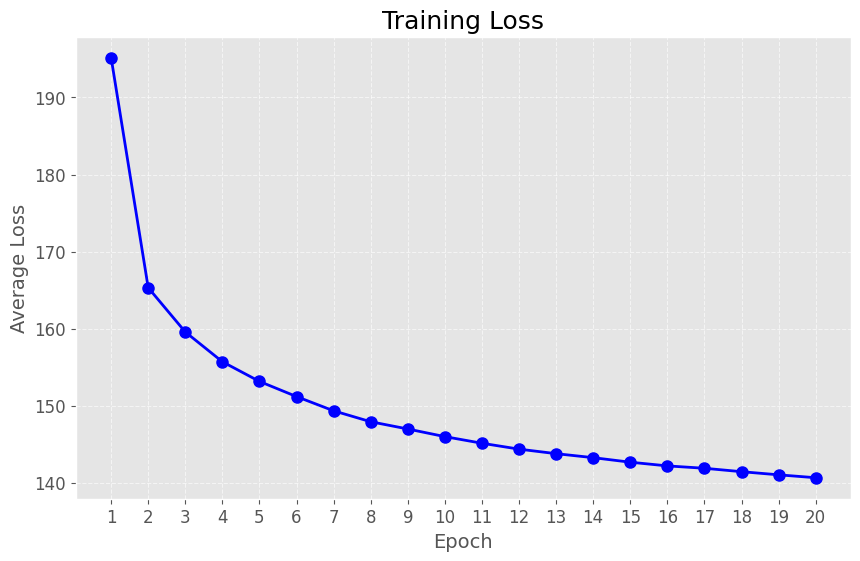

In [ ]:
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (8, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

num_epochs = 20
loss_history = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        x_recon, mu, logvar, z, _ = model(data)
        loss = loss_function(data, x_recon, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    avg_loss = train_loss / len(train_loader.dataset)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

    model.eval()
    all_mu = []
    all_labels = []
    with torch.no_grad():
        for data, labels in test_loader:
            data = data.to(device)
            _, mu, logvar, z, eps = model(data)
            print("Mean: ", mu[0])
            print("Logvar: ", logvar[0])
            print("Z: ", z[0])
            print("Eps: ", eps[0])
            all_mu.append(mu.cpu().numpy())
            all_labels.append(labels.numpy())
            break

    all_mu = np.concatenate(all_mu, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    plt.figure(figsize=(8,6))
    sc = plt.scatter(all_mu[:, 0], all_mu[:, 1],
                     c=all_labels, cmap='tab10', s=40, alpha=0.9, edgecolors='k')
    plt.title(f"2D Latent Space at Epoch {epoch+1}", fontsize=12)
    plt.xlabel("mu_1", fontsize=14)
    plt.ylabel("mu_2", fontsize=14)
    cbar = plt.colorbar(sc, pad=0.1, ticks=range(10))
    cbar.ax.set_yticklabels([str(i) for i in range(10)])
    if epoch == num_epochs-1:
        plt.savefig(f"latent_space_epoch_{epoch+1}.png", dpi=300)
    plt.show()


plt.figure(figsize=(10,6))
plt.plot(range(1, num_epochs+1), loss_history, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.title("Training Loss", fontsize=18)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Average Loss", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1, num_epochs+1))
plt.show()

## Câu hỏi 2:
**Mô tả:** Sau khi có $z$, ta truyền qua VAE Decoder để tái tạo lại hình ảnh đầu vào. Giả sử $log(var)$ và $\epsilon$ (trong Reparameterization Trick) không ảnh hưởng quá lớn, ta dựa vào $\mu$ để vẽ không gian tiềm ẩn (latent space) 2 chiều gồm $\mu_1$ và $\mu_2$ như hình vẽ, với các điểm tròn có màu sắc tương ứng với nhãn là một con số từ 0-9. Ví dụ: các điểm tròn màu xanh biển đậm là số 0, điểm tròn màu cam là số 1, ...

**Yêu cầu:** Với $z$ vừa tính được ở câu trước, đầu ra của VAE Decoder là số?

**Trắc nghiệm**:

A. số 1

B. số 3

C. số 5

D. số 7

**Đáp án: D**

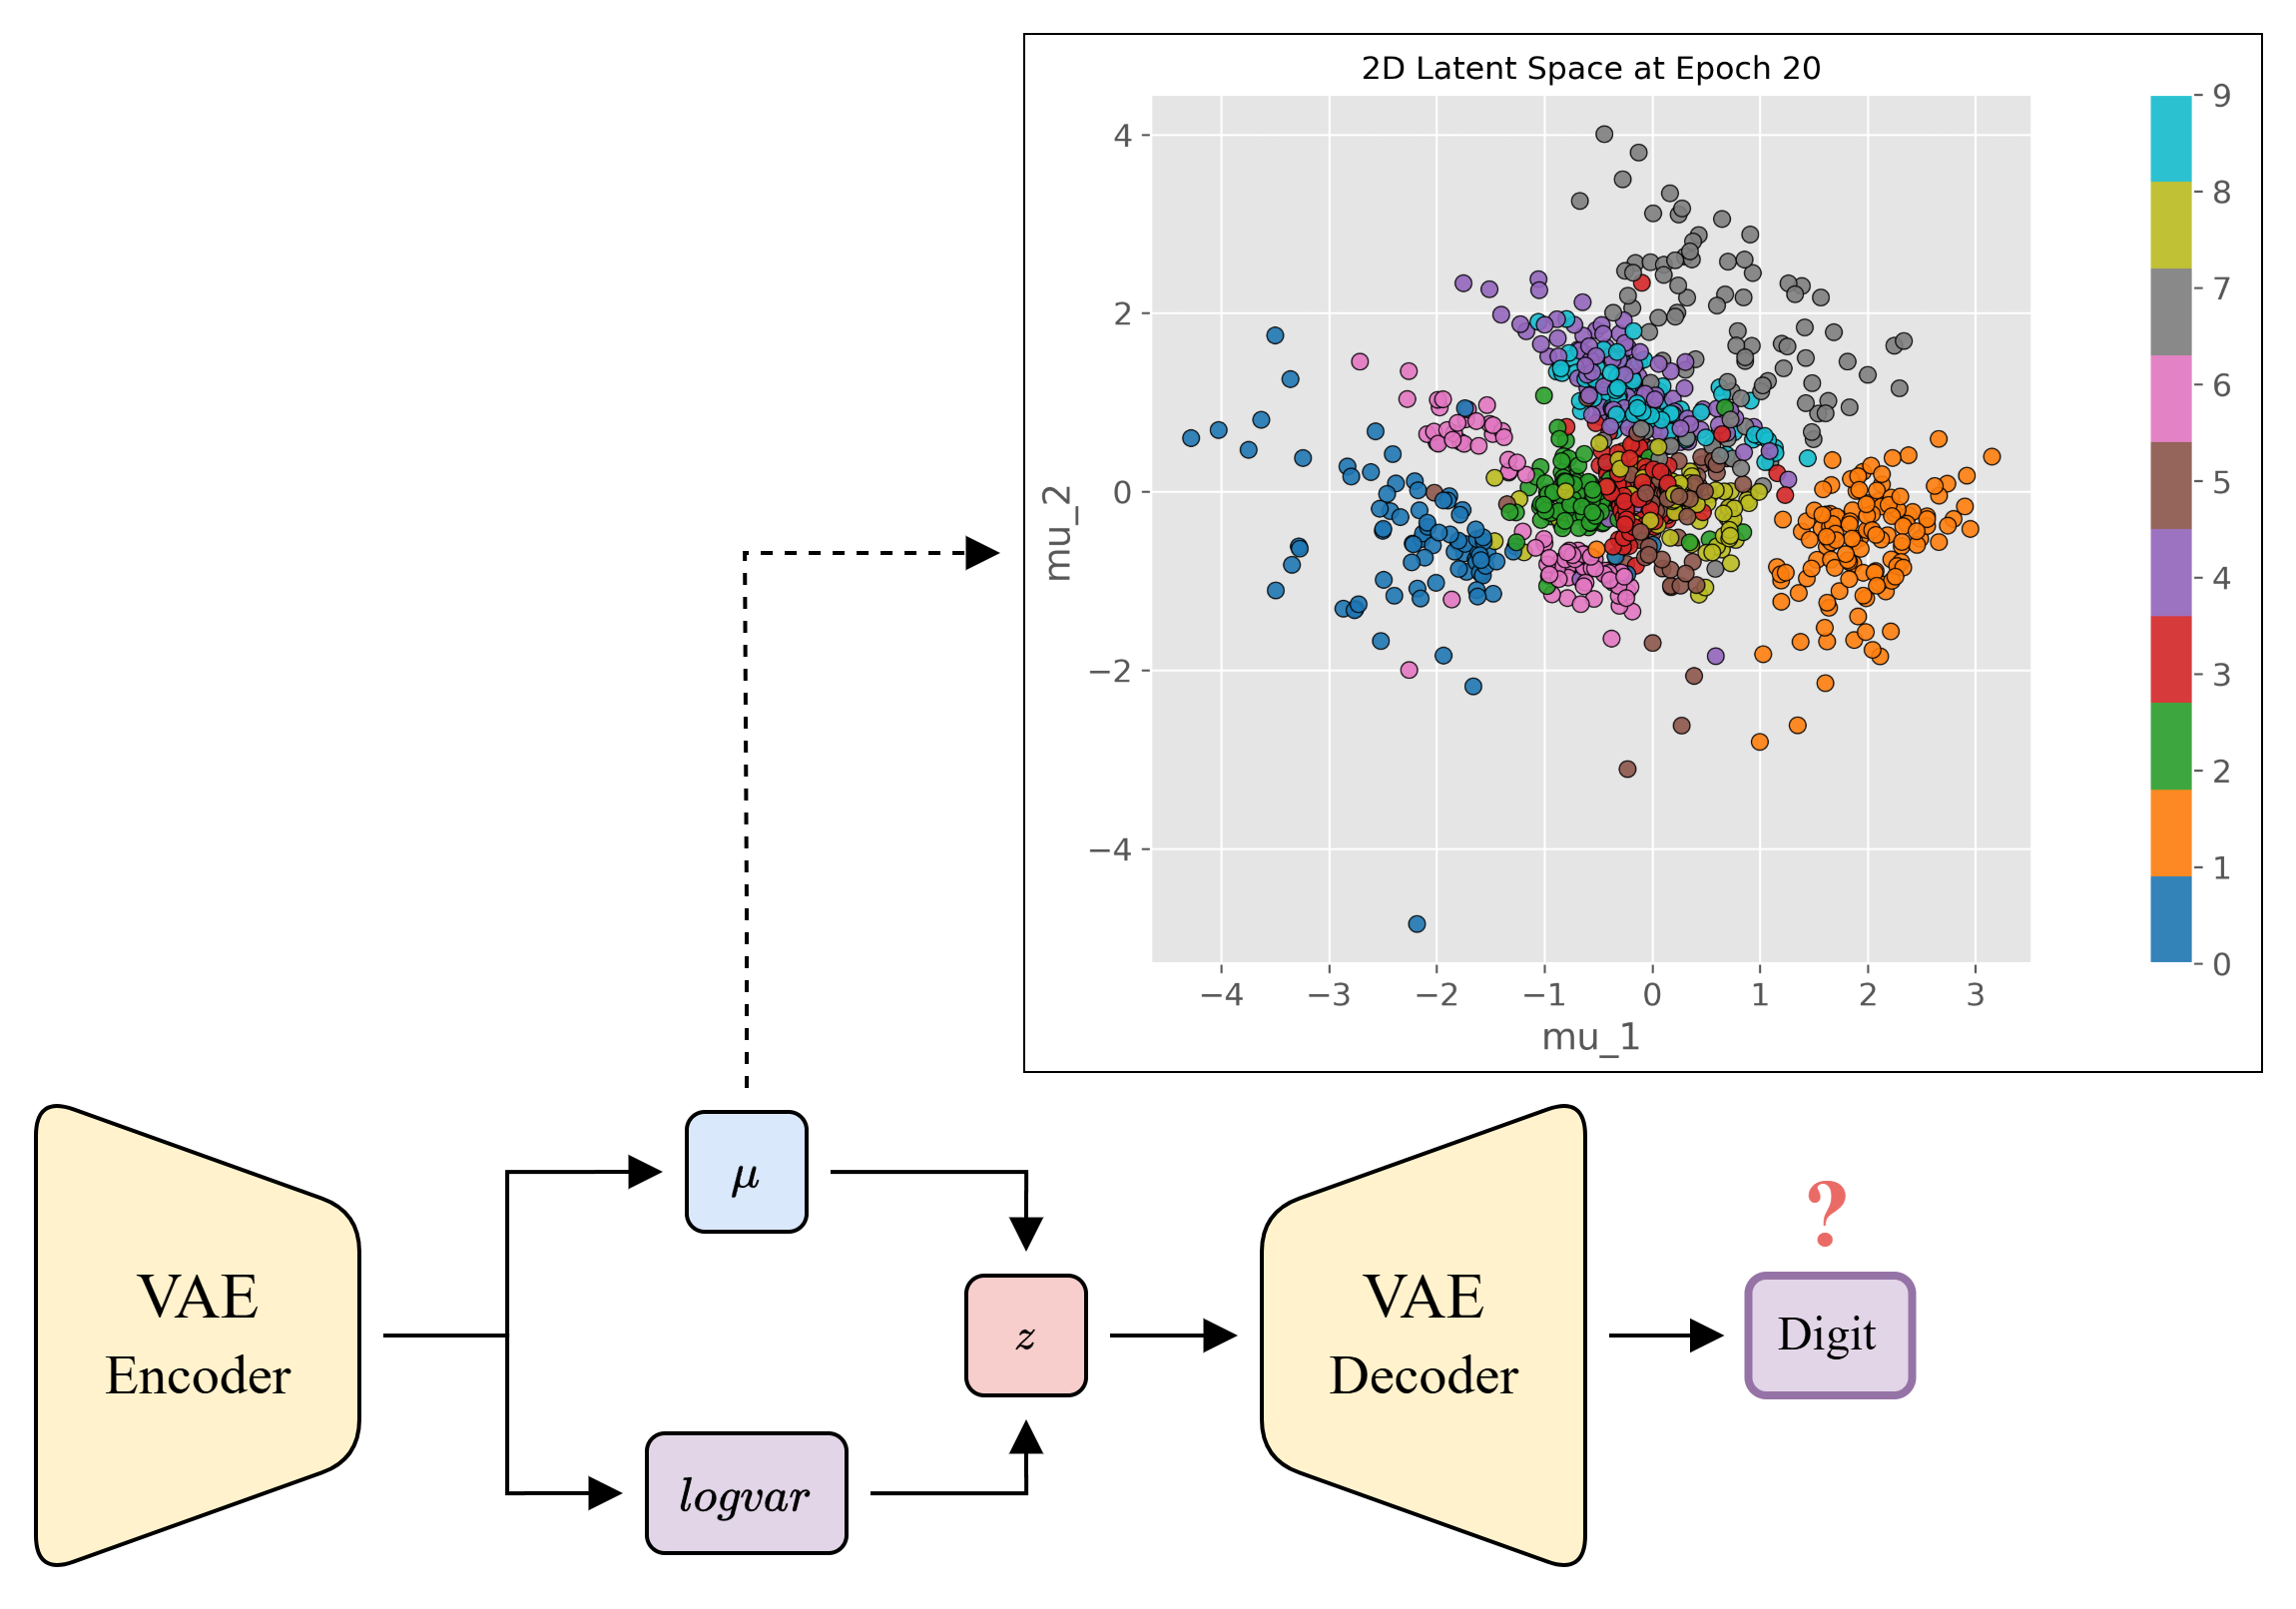

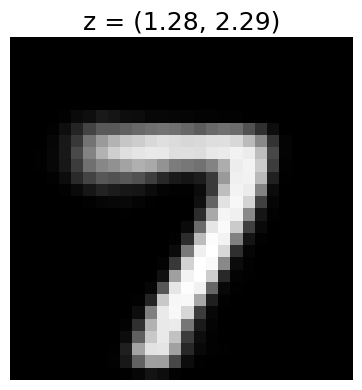

In [ ]:
latent_dim = model.latent_dim

batch_size = 1
z_random = torch.tensor([1.2771, 2.2900]).to(device)

model.eval()
with torch.no_grad():
    generated = model.decoder(z_random)
    generated = generated.view(batch_size, 1, 28, 28)

plt.subplots(1, batch_size, figsize=(4, 4))
for i in range(batch_size):
    plt.imshow(generated[i].cpu().squeeze(), cmap='gray')
    plt.axis("off")
    z_values = z_random.detach().cpu().numpy()
    z_string = ", ".join([f"{val:.2f}" for val in z_values])
    plt.title(f"z = ({z_string})", fontsize=18)

plt.tight_layout()
plt.show()